In [1]:
# 파일 저장 폴더생성
import os
PROJECT_ROOT_DIR = "./Stocks_output"
CHAPTER_ID = "ETF_KR"
SAMPLES_PATH = os.path.join(PROJECT_ROOT_DIR, "samples", CHAPTER_ID)
os.makedirs(SAMPLES_PATH, exist_ok=True)

#파일 경로 생성함수
def mkfile(file):
    PROJECT_ROOT_DIR = "./Stocks_output"
    CHAPTER_ID = "fdr_output"
    PATH = os.path.join(PROJECT_ROOT_DIR, "samples", CHAPTER_ID)
    file_o = os.path.join(SAMPLES_PATH,f'{file}.xlsx')
    return file_o

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "./Stocks_output"
CHAPTER_ID = "fdr_output"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    PROJECT_ROOT_DIR = "./Stocks_output"
    CHAPTER_ID = "fdr_output"
    IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 결측치제거 및 scaling
def scale(df):
    from sklearn.preprocessing import MinMaxScaler
    import pandas as pd
    df = df.fillna(method='pad').dropna(axis=0)
    scaler = MinMaxScaler()
    scaler.fit(df)
    output = scaler.transform(df)
    output = pd.DataFrame(output, columns=df.columns, index=df.index.values)
    return output

    
# 시각화
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus'] = False
path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 불필요한 경고 무시
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")


market = './market.csv'

## 가격 및 차트 함수 설정
# 한 plot 내에 다수 차트 생성 
def price_plot(codes,period):
    from datetime import datetime,timedelta
    import FinanceDataReader as fdr
    for code in codes:
        e_date = datetime.now()
        s_date = e_date - timedelta(int(period))
        df_temp = fdr.DataReader(code, s_date ,e_date)
        name = df[df.Symbol == code].Name.values[0]
        df_kospi = fdr.DataReader('KS11', s_date ,e_date)
        df_temp['p_index'] = df_temp['Close'].apply(lambda x: x/df_temp.iloc[0,3])
        df_temp['p_index'].plot(legend = 'a',label= name, figsize=(16,8))
    df_kospi['p_index'] = df_kospi['Close'].apply(lambda x: x/df_kospi.iloc[0,3])
    df_kospi['p_index'].plot(color = 'grey',legend = 'a',label= 'KOSPI지수', figsize=(16,8))
        
# 다중 차트 만드는 함수  
def price_plot_s(codes,period,row,col, fig = (16,8)):
    import pandas as pd
    from datetime import datetime,timedelta
    import FinanceDataReader as fdr
    import matplotlib.pyplot as plt
    for idx, code in enumerate(codes):

        e_date = datetime.now()
        s_date = e_date - timedelta(int(period))
        df_temp = fdr.DataReader(code, s_date ,e_date)
        df_kospi = fdr.DataReader('KS11', s_date ,e_date)
        name = df[df.Symbol == code].Name.values[0]
                
        plt.subplot(row,col,idx+1) # subplot : 도화지를 나눔, 1행/2열로 나누고 첫번째도화지에...
        df_temp['p_index'] = df_temp['Close'].apply(lambda x: x/df_temp.iloc[0,3])
        df_temp['p_index'].plot(legend = 'a',label= name, figsize=fig)
        df_kospi['p_index'] = df_kospi['Close'].apply(lambda x: x/df_kospi.iloc[0,3])
        df_kospi['p_index'].plot(color = 'grey', legend = 'a',label= 'KOSPI지수', figsize=fig)
        
        
def plot_s(df,period,row,col, fig = (16,8)):
    import pandas as pd
    from datetime import datetime,timedelta
    import FinanceDataReader as fdr
    import matplotlib.pyplot as plt
    for idx, code in enumerate(codes):

        e_date = datetime.now()
        s_date = e_date - timedelta(int(period))
        df_temp = fdr.DataReader(code, s_date ,e_date)
        df_kospi = fdr.DataReader('KS11', s_date ,e_date)
        name = df[df.Symbol == code].Name.values[0]
                
        plt.subplot(row,col,idx+1) # subplot : 도화지를 나눔, 1행/2열로 나누고 첫번째도화지에...
        df_temp['p_index'] = df_temp['Close'].apply(lambda x: x/df_temp.iloc[0,3])
        df_temp['p_index'].plot(legend = 'a',label= name, figsize=fig)
        df_kospi['p_index'] = df_kospi['Close'].apply(lambda x: x/df_kospi.iloc[0,3])
        df_kospi['p_index'].plot(color = 'grey', legend = 'a',label= 'KOSPI지수', figsize=fig)

# Symbol 리스트로 df 불러오기
def price_codes(codes, period):
    import pandas as pd
    import FinanceDataReader as fdr
    from datetime import datetime,timedelta
    import matplotlib.pyplot as plt
    import pandas as pd

    e_date = datetime.now()
    s_date = e_date - timedelta(int(period))
    
    df_m = pd.DataFrame()
    df_m_index = pd.DataFrame()
    
    for code in codes:
        df_temp = fdr.DataReader(code, s_date ,e_date)
        name = df[df.Symbol == code].Name.values[0]
        df_temp['p_index'] = df_temp['Close'].apply(lambda x: x/df_temp.iloc[0,3])
        df_m[name] = df_temp['Close']
        df_m_index[name] = df_temp['p_index']
    df_kospi = fdr.DataReader('KS11', s_date ,e_date)
    df_cur = fdr.DataReader('USD/KRW', s_date ,e_date)
    df_kospi['p_index'] = df_kospi['Close'].apply(lambda x: x/df_kospi.iloc[0,3])
    df_cur['p_index'] = df_cur['Close'].apply(lambda x: x/df_cur.iloc[0,3])
    df_m_index['KOSPI'] = df_kospi['p_index'] 
    df_m_index['USD/KRW'] = df_cur['p_index'] 
    
    return df_m, df_m_index

# Symbol 리스트로 df 불러오기
def price_codes(codes, period):
    import pandas as pd
    import FinanceDataReader as fdr
    from datetime import datetime,timedelta
    import matplotlib.pyplot as plt
    import pandas as pd
    df = pd.read_csv(market, encoding = 'euckr',index_col =0)

    e_date = datetime.now()
    s_date = e_date - timedelta(int(period))
    
    df_m = pd.DataFrame()
    df_m_index = pd.DataFrame()
    
    for code in codes:
        df_temp = fdr.DataReader(code, s_date ,e_date)
        name = df[df.Symbol == code].Name.values[0]
        df_temp['p_index'] = df_temp['Close'].apply(lambda x: x/df_temp.iloc[0,3])
        df_m[name] = df_temp['Close']
        df_m_index[name] = df_temp['p_index']
    df_kospi = fdr.DataReader('KS11', s_date ,e_date)
    df_cur = fdr.DataReader('USD/KRW', s_date ,e_date)
    df_kospi['p_index'] = df_kospi['Close'].apply(lambda x: x/df_kospi.iloc[0,3])
    df_cur['p_index'] = df_cur['Close'].apply(lambda x: x/df_cur.iloc[0,3])
    df_m_index['KOSPI'] = df_kospi['p_index'] 
    df_m_index['USD/KRW'] = df_cur['p_index'] 
    
    return df_m, df_m_index 

# Symbol 리스트로 df 불러오기
def price(codes, period):
    import pandas as pd
    import FinanceDataReader as fdr
    from datetime import datetime,timedelta
    import matplotlib.pyplot as plt
    import pandas as pd

    e_date = datetime.now()
    s_date = e_date - timedelta(int(period))
    
    df_m = pd.DataFrame()
    df_m_index = pd.DataFrame()
    
    for code in codes:
        df_temp = fdr.DataReader(code, s_date ,e_date)
        df_temp = df_temp.fillna(method='pad').dropna(axis=0)
        df_temp['p_index'] = df_temp['Close'].apply(lambda x: x/df_temp.iloc[0,3])
        df_m[code] = df_temp['Close']
        df_m_index[code] = df_temp['p_index']
    return df_m, df_m_index 

구분|심볼
---|---
한국 주요 지수		
KS11|	KOSPI 지수	
KQ11|	KOSDAQ 지수	
KS50|	KOSPI 50 지수	
KS100|	KOSPI 100	
KRX100|	KRX 100	
KS200	|코스피 200	
미국  주요 지수		
DJI	|다우존스 지수	
IXIC|	나스닥 종합 지수	
US500|	S&P 500 지수	
RUTNU|	러셀 2000 (US Small Cap 2000)	
VIX|	CBOE 변동성 지수 (공포지수)	
국가별| 대표 지수		
JP225|	닛케이 225 선물	
STOXX50|	유럽 STOXX 50	
HK50|	항셍 지수	
CSI300|	CSI 300 (중국)	
TWII	|대만 가권 지수	
HNX30|	베트남 하노이	
SSEC	|상해 종합	
UK100	|영국 FTSE	
DE30	|독일 DAX 30	
FCHI	|프랑스 CAC 40	
상품선물		
NG	|천연가스 선물 (NYMEX)	
GC	|금 선물 (COMEX)	
SI	|은 선물 (COMEX)	
HG	|구리 선물 (COMEX)	
CL	|WTI유 선물 (NYMEX)	
환율	|	
USD/KRW	|달러당 원화 환율	
USD/EUR	|달러당 유로화 환율	
USD/JPY	|달러당 엔화 환율	
CNY/KRW	|위엔화 원화 환율	
EUR/USD	|유로화 달러 환율	
USD/JPY	|달러 엔화 환율	
JPY/KRW	|엔화 원화 환율	
AUD/USD	|오스트레일리아 달러 환율	
EUR/JPY	|유로화 엔화 환율	
USD/RUB	| 달러 루블화	
한국 채권	1)	
KR1YT=X	|1년만기 한국 국채 수익률	
KR3YT=X	|1년만기 한국 국채 수익률	
KR5YT=X	|5년만기 한국 국채 수익률	
KR10YT=X	|10년만기 한국 국채 수익률	
미국 채권	2) 3)	
US1MT=RR	|1개월 미국 국채 수익률	
US6MT=RR	|6개월 미국 국채 수익률	
US1YT=RR	|1년만기 미국 국채 수익률	
US5YT=RR	|5년만기 미국 국채 수익률	
US10YT=RR	|10년만기 미국 국채 수익률	
US30YT=RR	|30년만기 미국 국채 수익률

<AxesSubplot:xlabel='Date'>

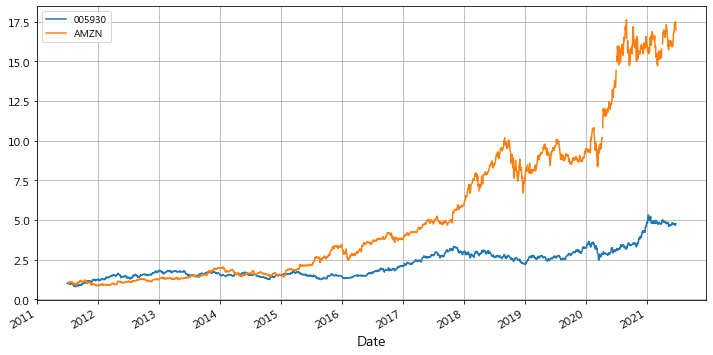

In [2]:
df = price(['005930','AMZN'],3650)
df[1].plot()

In [3]:
stocks= {'IXIC':'나스닥',
'US500':'S&P500',
'KS11':'코스피'}

In [4]:
stock = price(stocks.keys(),365*14)
for s in stock:
    s.columns = stocks.values()
stock

(                나스닥   S&P500      코스피
 Date                                 
 2007-07-02   2632.3  1519.43  1771.35
 2007-07-03   2644.9  1524.87  1805.50
 2007-07-05   2656.6  1525.40  1847.79
 2007-07-06   2666.5  1530.44  1861.01
 2007-07-09   2670.0  1531.85  1883.59
 ...             ...      ...      ...
 2021-06-21  14141.5  4224.79  3240.79
 2021-06-22  14253.3  4246.44  3263.88
 2021-06-23  14271.7  4241.84  3276.19
 2021-06-24  14369.7  4266.49  3286.10
 2021-06-25  14360.4  4280.70  3302.84
 
 [3522 rows x 3 columns],
                  나스닥    S&P500       코스피
 Date                                    
 2007-07-02  1.006693  1.009816  1.019993
 2007-07-03  1.011511  1.013432  1.039657
 2007-07-05  1.015986  1.013784  1.064009
 2007-07-06  1.019772  1.017133  1.071621
 2007-07-09  1.021111  1.018071  1.084624
 ...              ...       ...       ...
 2021-06-21  5.408253  2.807804  1.866137
 2021-06-22  5.451010  2.822192  1.879433
 2021-06-23  5.458047  2.819135  1.886522
 20

In [5]:
commodities= {'NG':'천연가스 선물',
'GC':'금 선물',
'SI':'은 선물',
'HG':'구리 선물',
'CL':'WTI유 선물'}

In [6]:
commodity = price(commodities.keys(),365*14)
for com in commodity:
    com.columns = commodities.values()
commodity

(            천연가스 선물   금 선물    은 선물   구리 선물  WTI유 선물
 Date                                               
 2007-07-02    6.764    NaN     NaN  3.5350    32.58
 2007-07-03    6.754  13.58     NaN  3.5630    32.79
 2007-07-05    6.618  13.31     NaN  3.6080    33.02
 2007-07-06    6.444  13.35     NaN  3.6110    33.01
 2007-07-09    6.410  13.40     NaN  3.6480    33.10
 ...             ...    ...     ...     ...      ...
 2021-06-18    3.215  44.78   94.82  4.1570    81.02
 2021-06-21    3.191  44.78   97.90  4.1840    81.44
 2021-06-22    3.258  44.80   96.74  4.2300    81.29
 2021-06-23    3.333  44.55   99.70  4.3305    80.25
 2021-06-24    3.418  44.66  106.84  4.3110    80.56
 
 [3518 rows x 5 columns],
              천연가스 선물      금 선물      은 선물     구리 선물   WTI유 선물
 Date                                                        
 2007-07-02  1.032514       NaN       NaN  1.023451  1.004625
 2007-07-03  1.030988  1.044615       NaN  1.031558  1.011101
 2007-07-05  1.010227  1.023846    

In [7]:
indexs = {'DEXKOUS': '원화달러화 환율',
'M2': '미국M2통화량',
'KORCPIALLMINMEI': '한국 종합소비자물가지수',
'KORCPIHOUMINMEI': '한국 주택소비자물가지수',
'KORCPIENGMINMEI': '한국 에너지소비자물가지수',
'KORCPIFODMINMEI': '한국 식음료소비자물가지수',
'KORRGDPC': '한국 1인당 실질 GDP',
'HDTGPDKRQ163N': 'GDP 대비 가계부채'}

In [8]:
import FinanceDataReader as fdr
ind = fdr.DataReader([i for i in indexs.keys()],'2007-01-22','2021-01-15',data_source='fred')
index = list()
index.append(ind)
index.append(scale(ind))
for i in index:
    i.columns = indexs.values()
index

[            원화달러화 환율  미국M2통화량  한국 종합소비자물가지수  한국 주택소비자물가지수  한국 에너지소비자물가지수  \
 DATE                                                                       
 2007-01-01   27406.0      NaN         80.64     93.113821         84.667   
 2007-01-22   27406.0   940.50         80.64     93.113821         84.667   
 2007-01-23   27406.0   940.00         80.64     93.113821         84.667   
 2007-01-24   27406.0   935.50         80.64     93.113821         84.667   
 2007-01-25   27406.0   935.90         80.64     93.113821         84.667   
 ...              ...      ...           ...           ...            ...   
 2021-01-11   30254.0  1097.39        106.47    125.165076         89.910   
 2021-01-12   30254.0  1099.57        106.47    125.165076         89.910   
 2021-01-13   30254.0  1098.31        106.47    125.165076         89.910   
 2021-01-14   30254.0  1098.37        106.47    125.165076         89.910   
 2021-01-15   30254.0  1099.39        106.47    125.165076         89.910   

In [10]:
import pandas as pd
pd.concat([stock[1],commodity[1],index[1]],axis=1).fillna(method='pad').fillna(method='bfill').corr()

,나스닥,S&P500,코스피,천연가스 선물,금 선물,은 선물,구리 선물,WTI유 선물,원화달러화 환율,미국M2통화량,한국 종합소비자물가지수,한국 주택소비자물가지수,한국 에너지소비자물가지수,한국 식음료소비자물가지수,한국 1인당 실질 GDP,GDP 대비 가계부채
나스닥,1.000000,0.984498,0.816342,-0.488147,0.846747,0.573648,0.002825,0.820230,0.506126,-0.261512,0.840131,0.844927,-0.417314,0.785990,0.912173,0.978082
S&P500,0.984498,1.000000,0.826764,-0.480232,0.891914,0.498363,-0.025327,0.868912,0.544067,-0.302443,0.876584,0.895857,-0.403751,0.828371,0.906454,0.969102
코스피,0.816342,0.826764,1.000000,-0.407457,0.693424,0.596774,0.391417,0.743292,0.616460,-0.575723,0.750821,0.715998,-0.122554,0.730711,0.589972,0.771929
천연가스 선물,-0.488147,-0.480232,-0.407457,1.000000,-0.409308,-0.106145,0.257646,-0.620438,-0.718425,0.367892,-0.726367,-0.667020,-0.098658,-0.729882,-0.425264,-0.582524
금 선물,0.846747,0.891914,0.693424,-0.409308,1.000000,0.327873,-0.092364,0.723489,0.450094,-0.243229,0.799159,0.839417,-0.419784,0.764633,0.810172,0.819463
은 선물,0.573648,0.498363,0.596774,-0.106145,0.327873,1.000000,0.311465,0.291660,0.105120,-0.134775,0.268198,0.230339,-0.194153,0.211957,0.412692,0.484718
구리 선물,0.002825,-0.025327,0.391417,0.257646,-0.092364,0.311465,1.000000,-0.164335,0.116767,-0.416715,-0.101282,-0.220865,0.391012,-0.076539,-0.280387,-0.102254
WTI유 선물,0.820230,0.868912,0.743292,-0.620438,0.723489,0.291660,-0.164335,1.000000,0.749332,-0.511186,0.934774,0.948588,-0.150243,0.906594,0.743271,0.879947
원화달러화 환율,0.506126,0.544067,0.616460,-0.718425,0.450094,0.105120,0.116767,0.749332,1.000000,-0.732705,0.836760,0.748795,0.352576,0.863964,0.312741,0.592873
미국M2통화량,-0.261512,-0.302443,-0.575723,0.367892,-0.243229,-0.134775,-0.416715,-0.511186,-0.732705,1.000000,-0.518599,-0.423307,-0.534257,-0.532625,0.001982,-0.284101


<AxesSubplot:>

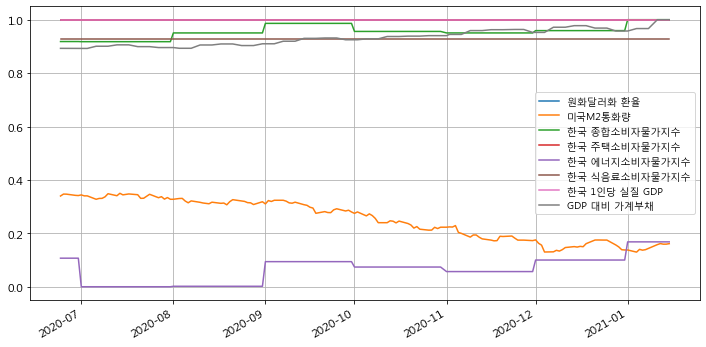

In [11]:
index[1][-150:].plot()

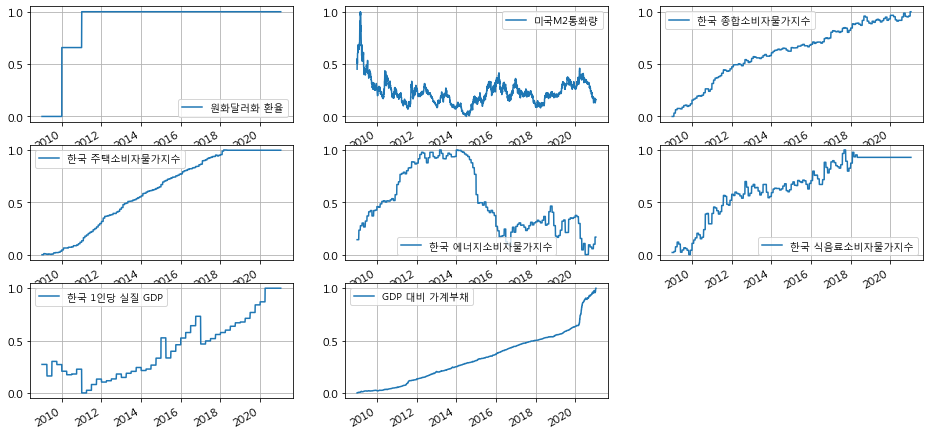

In [12]:
for idx, code in enumerate(index[1]):
    plt.subplot(3,3,idx+1)
    index[1][code].plot(legend = 'a',label=code, figsize=(16,8))

In [16]:
code

'GDP 대비 가계부채'

In [13]:
for idx, code in enumerate(index[1]):
    print(code)

원화달러화 환율
미국M2통화량
한국 종합소비자물가지수
한국 주택소비자물가지수
한국 에너지소비자물가지수
한국 식음료소비자물가지수
한국 1인당 실질 GDP
GDP 대비 가계부채


In [14]:
        e_date = datetime.now()
        s_date = e_date - timedelta(int(period))
        df_temp = fdr.DataReader(code, s_date ,e_date)
        df_kospi = fdr.DataReader('KS11', s_date ,e_date)
        name = df[df.Symbol == code].Name.values[0]
                
        plt.subplot(row,col,idx+1) # subplot : 도화지를 나눔, 1행/2열로 나누고 첫번째도화지에...
        df_temp['p_index'] = df_temp['Close'].apply(lambda x: x/df_temp.iloc[0,3])
        df_temp['p_index'].plot(legend = 'a',label= name, figsize=fig)
        df_kospi['p_index'] = df_kospi['Close'].apply(lambda x: x/df_kospi.iloc[0,3])
        df_kospi['p_index'].plot(color = 'grey', legend = 'a',label= 'KOSPI지수', figsize=fig)
        

NameError: name 'datetime' is not defined

In [15]:
index[1]

,원화달러화 환율,미국M2통화량,한국 종합소비자물가지수,한국 주택소비자물가지수,한국 에너지소비자물가지수,한국 식음료소비자물가지수,한국 1인당 실질 GDP,GDP 대비 가계부채
2009-01-01,0.0,0.451047,0.0,0.00000,0.143166,0.021216,0.272207,0.000000
2009-01-02,0.0,0.551359,0.0,0.00000,0.143166,0.021216,0.272207,0.000000
2009-01-05,0.0,0.542806,0.0,0.00000,0.143166,0.021216,0.272207,0.002851
2009-01-06,0.0,0.531225,0.0,0.00000,0.143166,0.021216,0.272207,0.002851
2009-01-07,0.0,0.505033,0.0,0.00000,0.143166,0.021216,0.272207,0.002851
...,...,...,...,...,...,...,...,...
2021-01-11,1.0,0.157755,1.0,0.99742,0.168041,0.929281,1.000000,1.000000
2021-01-12,1.0,0.161639,1.0,0.99742,0.168041,0.929281,1.000000,1.000000
2021-01-13,1.0,0.159394,1.0,0.99742,0.168041,0.929281,1.000000,1.000000
2021-01-14,1.0,0.159501,1.0,0.99742,0.168041,0.929281,1.000000,1.000000


In [2]:
137367481	

137367481

In [1]:
592300000000

592300000000

In [5]:
592300000000/137367481

4311.791958971716

In [16]:
import pandas as pd
import requests
url = 'https://navercomp.wisereport.co.kr/v2/company/ajax/cF1001.aspx?cmp_cd=068270&fin_typ=0&freq_typ=Y&encparam=cW9EWFhMVzdIWmthNXp6RFhvcXdhUT09&id=ZlEwemUxRm'
pd.read_html(url)

XMLSyntaxError: no text parsed from document (<string>, line 0)

In [17]:
html.content

NameError: name 'html' is not defined

In [39]:
['KS11','US500','IXIC','VIX','USD/KRW']

['KS11', 'US500', 'IXIC', 'VIX', 'USD/KRW']

In [18]:
import pandas as pd
krx = pd.read_csv('./krx.csv', encoding='euckr')
krx['Symbol'] = krx['Symbol'].apply(lambda x:  '0'*(6-len(x)) + x 
                   if (len(str(x))<=5)
                   else x)
nyse = pd.read_csv('./nyse.csv', encoding='euckr')
nyse['Market'] = 'NYSE'
sp500 = pd.read_csv('./sp500.csv', encoding='euckr')
nyse['Market'] = 'SP500'

df = pd. concat([nyse,sp500,krx],axis=0)
df = df[['Symbol','Market','Name','Industry']]
df.to_csv('market.csv', encoding = 'euckr')

In [19]:
market =  pd.read_csv('./market.csv', encoding='euckr',index_col =0)
market

,Symbol,Market,Name,Industry
0,BABA,SP500,Alibaba Group Holding Ltd ADR,소프트웨어 및 IT서비스
1,TSM,SP500,Taiwan Semiconductor Manufacturing Co Ltd ADR,반도체 및 반도체 장비
2,V,SP500,Visa Inc Class A,소프트웨어 및 IT서비스
3,JPM,SP500,JPMorgan Chase & Co,은행
4,JNJ,SP500,Johnson & Johnson,제약
...,...,...,...,...
2607,000547,KOSPI,흥국화재2우B,NaN
2608,000545,KOSPI,흥국화재우,NaN
2609,003280,KOSPI,흥아해운,외항화물운송업(케미컬탱커)
2610,037440,KOSDAQ,희림,설계 및 감리용역


In [ ]:

excels = [pd.ExcelFile(os.path.join(SAMPLES_PATH,file)) for file in files]  
frames = [x.parse(x.sheet_names[0], header=None,index_col=None) for x in excels]  
frames[1:] = [df[1:] for df in frames[1:]]  
combined = pd.concat(frames)
test2 = mkfile('test2')
combined.to_excel(test2, header=False, index=False)

In [90]:
encparam={'090430':'ZUs2dTlNK2NZOXU2ZnR1TzRCQ0RJZz09','005930':'cFFCNXNLMTh5MUJjSlF1aE8zYlpOUT09'}

In [ ]:
{'DEXKOUS': '원화달러화 환율',
'M2': 'M2통화량',
'NASDAQCOM': '나스닥종합지수',
'KORCPIALLMINMEI': '한국 종합소비자물가지수',
'KORCPIHOUMINMEI': '한국 주택소비자물가지수',
'KORCPIENGMINMEI': '한국 에너지소비자물가지수',
'KORCPIFODMINMEI': '한국 식음료소비자물가지수',
'KORRGDPR': '한국 실질 GDP',
'KORRGDPC': '한국 1인당 실질 GDP',
'MKTGDPKRA646NWDB': '한국 GDP',
'MKTGDPCNA646NWDB': '중국 GDP',
'HDTGPDKRQ163N': 'GDP 대비 가계부채'}